## Introduction

**K-means** is vastly used for clustering in many data science applications. It is especially useful if you need to quickly discover insights from **unlabeled data**.

Real-world applications of k-means include:
- Customer segmentation
- Understanding what website visitors are trying to accomplish
- Pattern recognition
- Feature engineering 
- Data compression

## Import Libraries and Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as ex

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Lets' generate our own dataset using `make_blob` class**<br>

The make_blobs class can take in many inputs, but we will be using these specific ones.

Input<br>
n_samples: The total number of points equally divided among clusters.
Value will be: 5000
centres : The number of centres to generate, or the fixed centre locations.
Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
cluster_std: The standard deviation of the clusters.
Value will be: 0.9

Output<br>
X: Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.
y: Array of shape [n_samples]. (Response Vector)
The integer labels for cluster membership of each sample.

In [8]:
X, y = make_blobs(n_samples = 5000,
                  centers = [[4, 4], [-2, -1], [2, -3], [1, 1]],
                  cluster_std = 0.9)

**Let's visualize the clusters**

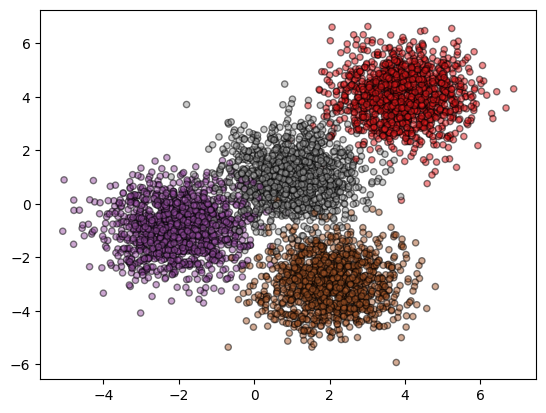

In [13]:
plt.scatter(X[:, 0], X[:, 1], marker='.', alpha=0.5, s=80, ec='k', cmap='Set1', c=y)
plt.show()

<h2 id="setting_up_K_means">Setting up k-means</h2>
Now that we have our random data, let's set up our k-means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:

- `init`: Initialization method of the centroids.
  - Value will be: `k-means++` 
  - `k-means++`: Selects initial cluster centres for k-means clustering in a smart way to speed up convergence.
- `n_clusters`: The number of clusters to form as well as the number of centroids to generate. 
  -  Value will be: 4 (since we have 4 centres) 
- `n_init`: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. 
   - Value will be: 12  


Initialize `KMeans` with these parameters, where the output variable is called `k_means`.


In [14]:
model = KMeans(init='k-means++', n_clusters=4, n_init=12)
model.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's get the label for each point in the model using the `model.labels_` attribute and save them as `k_means_labels`.


In [19]:
k_means_labels = model.labels_
k_means_labels

array([1, 1, 1, ..., 3, 0, 2], shape=(5000,), dtype=int32)

We will also get the coordinates of the cluster centers using `model.cluster_centers_` and save it as `k_means_cluster_centers`.


In [20]:
k_means_cluster_centers = model.cluster_centers_
k_means_cluster_centers

array([[-2.07172119, -0.95670396],
       [ 3.92593726,  4.013803  ],
       [ 2.0271874 , -3.00371414],
       [ 0.97849814,  0.97841495]])

**Let's visualize the result**

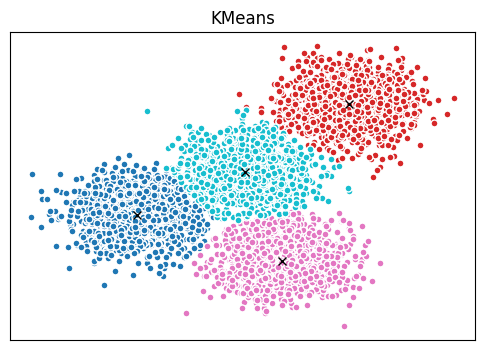

In [64]:
fig = plt.figure(figsize=(6, 4))

# Lets generate colors using matplotlib library
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Add a subplot
ax = fig.add_subplot(1,1,1)

for k, color in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels==k)
    
    # Define the centroid, or cluster center.
    cluster_centers = k_means_cluster_centers[k]
    
    # Plots the data points with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', mfc=color, marker='.', ms=10)
    ax.plot(cluster_centers[0], cluster_centers[1], 'o', mfc=color, marker='x', mec='k', ms=6)
    
# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

## Lets try out for changing cluster size**

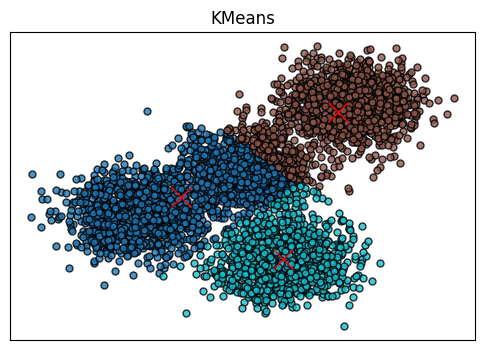

In [85]:
def cluster_3(samples):
    model_k = KMeans(init='k-means++',
                   n_clusters=samples,
                   n_init=12)
    model_k.fit(X)
    cluster_labels_3 = model_k.labels_
    cluster_centers_3 = model_k.cluster_centers_
    def plot_cluster_3():
        fig = plt.figure(figsize=(6, 4))
        colors = plt.cm.tab10(np.linspace(0, 1, len(set(cluster_labels_3))))
        ax_3 = fig.add_subplot(1,1,1)
        for k, color in enumerate(colors):
            cluster_center = cluster_centers_3[k]
            ax_3.plot(X[cluster_labels_3==k, 0], X[cluster_labels_3==k, 1], ls='None', marker='.', mfc=color, mec='k', ms=10, alpha=0.8)
            ax_3.plot(cluster_center[0], cluster_center[1], 'x', mfc=color, mec='r', ms=15)
    
        # Title of the plot
        ax_3.set_title('KMeans')

        # Remove x-axis ticks
        ax_3.set_xticks(())

        # Remove y-axis ticks
        ax_3.set_yticks(())

        # Show the plot
        plt.show()
    plot_cluster_3()

cluster_3(3)

## Using ScatterPlot

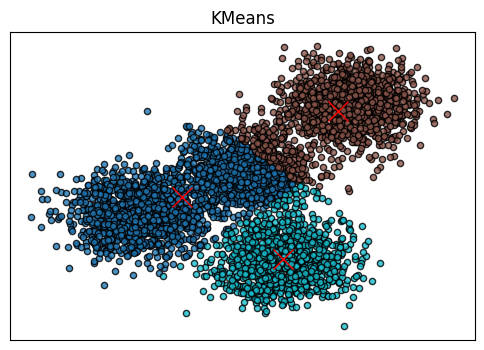

In [87]:
def cluster_3(samples):
    model_k = KMeans(init='k-means++',
                   n_clusters=samples,
                   n_init=12)
    model_k.fit(X)
    cluster_labels_3 = model_k.labels_
    cluster_centers_3 = model_k.cluster_centers_
    def plot_cluster_3():
        fig = plt.figure(figsize=(6, 4))
        colors = plt.cm.tab10(np.linspace(0, 1, len(set(cluster_labels_3))))
        ax_3 = fig.add_subplot(1,1,1)
        for k, color in enumerate(colors):
            cluster_center = cluster_centers_3[k]
            ax_3.scatter(X[cluster_labels_3==k, 0], X[cluster_labels_3==k, 1], marker='.', color=color, ec='k', s=80, alpha=0.8)
            ax_3.plot(cluster_center[0], cluster_center[1], 'x', mfc=color, mec='r', ms=15)
    
        # Title of the plot
        ax_3.set_title('KMeans')

        # Remove x-axis ticks
        ax_3.set_xticks(())

        # Remove y-axis ticks
        ax_3.set_yticks(())

        # Show the plot
        plt.show()
    plot_cluster_3()

cluster_3(3)